In [2]:
!pip install musdb

In [3]:
# Import necessary libraries
import numpy as np
from IPython.display import Audio
import musdb
import librosa
import librosa.display
import matplotlib.pyplot as plt

# load musdb sample (change root for download dir)
mus_train = musdb.DB(root='musdb18_train', subsets='train', split='train', download=True)
mus_valid = musdb.DB(root='musdb18_valid', subsets="train", split='valid', download=True)
mus_test = musdb.DB(root='musdb18_test', subsets='test', download=True)

100%|██████████| 140M/140M [00:00<00:00, 238MB/s]


100%|██████████| 140M/140M [00:00<00:00, 227MB/s]


100%|██████████| 140M/140M [00:00<00:00, 176MB/s]


In [4]:
# check length of tracks
print(len(mus_train.tracks), len(mus_valid.tracks), len(mus_test.tracks))

# Load a specific track from the MUSDB18 dataset
# The dataset is assumed to be previously loaded and accessible via the variable `mus`
track = mus_test.tracks[1]

# Extract the audio data from the track and transpose it
# Transposing is needed because the audio data is originally in channels x samples format,
# and we might need it in samples x channels format depending on further processing requirements.
audio = track.audio.T

# Define the sample rate of the audio
# This is the number of samples of audio carried per second, measured in Hz or kHz.
# For CD-quality audio, this is typically 44100 Hz (or 44.1 kHz).
sample_rate = 44100

# Create an audio player widget in the Jupyter Notebook to play the audio data.
# The `Audio` class from IPython.display is used here to play the numpy array `audio`.
# The sample rate information is crucial for correct playback speed and pitch.
Audio(data=audio, rate=sample_rate)

80 14 50


In [5]:
# check type of audio (ndarray)
print(type(audio))

<class 'numpy.ndarray'>


In [6]:
audio = audio.astype(np.float32)

<ipython-input-7-6a359c0ab852>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path=audio_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


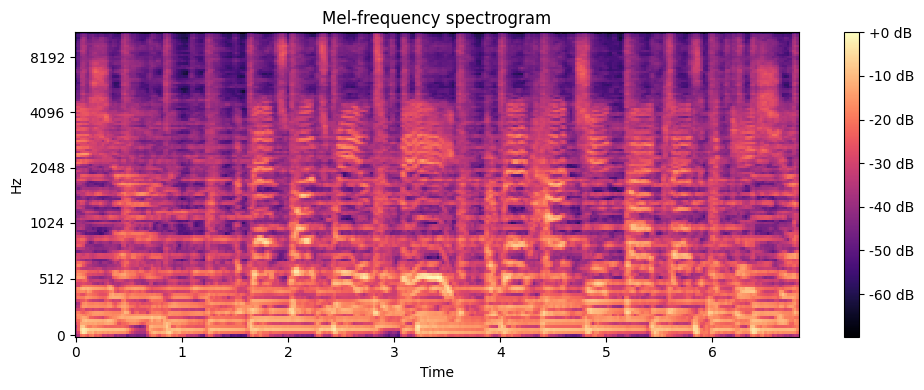

In [7]:
def audio_to_mel_spectrogram(audio_path, n_fft=2048, hop_length=512, n_mels=128):
    """
    Converts an audio file to a Mel spectrogram.

    Parameters:
    - audio_path: Path to the audio file.
    - n_fft: Length of the FFT window.
    - hop_length: Number of samples between successive frames.
    - n_mels: Number of Mel bands to generate.

    Returns:
    - S_dB: Mel spectrogram in dB.
    - sr: Sampling rate.
    """
    # Load the audio file
    y, sr = librosa.load(path=audio_path)

    # Convert to Mel spectrogram using keyword arguments
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

    # Convert to dB
    S_dB = librosa.power_to_db(S, ref=np.max)

    return S_dB, sr

def plot_mel_spectrogram(S_dB, sr, hop_length):
    """
    Plots a Mel spectrogram.

    Parameters:
    - S_dB: Mel spectrogram (in dB).
    - sr: Sample rate of the audio signal.
    - hop_length: Number of samples between successive frames.
    """
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

# Update this path to your audio file
audio_path = '/content/musdb18_test/test/Al James - Schoolboy Facination.stem.mp4'
S_dB, sr = audio_to_mel_spectrogram(audio_path)
plot_mel_spectrogram(S_dB, sr, hop_length=512)